In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, Column
from astropy.io.votable import parse_single_table
from decam_tools import plot_decam_footprint, plot_mwd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load and display DECam observations done by Munoz and Puzia

In [13]:
cat_file='data/NOAO_Munoz_Puzia_Taylor_may_2016.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])
    cat_data['object'][i]=str(cat_data['object'][i][:7])

print 'Column names: ', str(cat_data.colnames)
print np.unique(cat_data['dtpi']+' '+cat_data['dtpropid'])
print np.unique(cat_data['object'])

Column names:  ['reference', 'dtpropid', 'surveyid', 'release_date', 'start_date', 'date_obs', 'dtpi', 'object', 'ra', 'dec', 'telescope', 'instrument', 'filter', 'exposure', 'obstype', 'obsmode', 'proctype', 'prodtype', 'seeing', 'depth', 'dtacqnam', 'archive_file', 'filesize', 'md5sum']
       dtpi      
-----------------
 Munoz 2013A-0613
 Munoz 2013B-0613
 Munoz 2013B-0614
 Munoz 2014A-0611
 Munoz 2014B-0609
 Munoz 2015B-0602
 Puzia 2015A-0630
 Puzia 2016A-0614
Taylor 2014A-0610
 object
-------
       
055950-
080000-
100000-
120000-
140000-
160100-
180000-
AGC2279
AGC2387
    ...
z_p7_d5
z_p8_d1
z_p8_d2
z_p8_d3
z_p8_d4
z_p8_d5
z_p9_d1
z_p9_d2
z_p9_d3
z_p9_d4
z_p9_d5
Length = 410 rows


In [14]:
do_program=np.array(['2013B-0613','2014B-0609','2015B-0602','2015A-0630','2016A-0614','2014A-0610'])
try:
    cat_data.add_column(Column(name='do_analysis', data=[False]*len(cat_data)))
except:
    print 'Column was already in the table'


for i in range(len(cat_data)):
    cat_data['do_analysis'][i]= ( np.any(do_program==cat_data['dtpropid'][i]) and cat_data['exposure'][i] >=15. and cat_data['object'][i].startswith('SDSS') == False and cat_data['object'][i].startswith('Point') == False and cat_data['object'][i].startswith('hexa') == False and cat_data['object'][i].startswith('stand') == False and cat_data['object'][i].startswith('std') == False)

gv=np.where(cat_data['do_analysis']==True)
cat_data=cat_data[gv]
cat_data

print np.array(np.unique(cat_data['object']))

['Fornax ' 'NGC1399' 'NGC2997' 'NGC3115' 'NGC3923' 'NGC6744' 'NGFS Fo'
 'Sky Pro' 'g_omcen' 'g_p10_d' 'g_p11_d' 'g_p12_d' 'g_p13_d' 'g_p14_d'
 'g_p15_d' 'g_p16_d' 'g_p17_d' 'g_p18_d' 'g_p19_d' 'g_p1_d1' 'g_p1_d2'
 'g_p1_d3' 'g_p1_d4' 'g_p1_d5' 'g_p20_d' 'g_p21_d' 'g_p22_d' 'g_p23_d'
 'g_p2_d1' 'g_p2_d2' 'g_p2_d3' 'g_p2_d4' 'g_p2_d5' 'g_p3_d1' 'g_p3_d2'
 'g_p3_d3' 'g_p3_d4' 'g_p3_d5' 'g_p4_d1' 'g_p4_d2' 'g_p4_d3' 'g_p4_d4'
 'g_p4_d5' 'g_p5_d1' 'g_p5_d2' 'g_p5_d3' 'g_p5_d4' 'g_p5_d5' 'g_p6_d1'
 'g_p6_d2' 'g_p6_d3' 'g_p6_d4' 'g_p6_d5' 'g_p7_d1' 'g_p7_d2' 'g_p7_d3'
 'g_p7_d4' 'g_p7_d5' 'g_p8_d1' 'g_p8_d2' 'g_p8_d3' 'g_p8_d4' 'g_p8_d5'
 'g_p9_d1' 'g_p9_d2' 'g_p9_d3' 'g_p9_d4' 'g_p9_d5' 'i_omcen' 'i_p10_d'
 'i_p11_d' 'i_p12_d' 'i_p13_d' 'i_p14_d' 'i_p15_d' 'i_p16_d' 'i_p17_d'
 'i_p18_d' 'i_p19_d' 'i_p1_d1' 'i_p1_d2' 'i_p1_d3' 'i_p1_d4' 'i_p1_d5'
 'i_p20_d' 'i_p21_d' 'i_p22_d' 'i_p23_d' 'i_p2_d1' 'i_p2_d2' 'i_p2_d3'
 'i_p2_d4' 'i_p2_d5' 'i_p3_d1' 'i_p3_d2' 'i_p3_d3' 'i_p3_d4' 'i_p3_d5'
 'i_p4

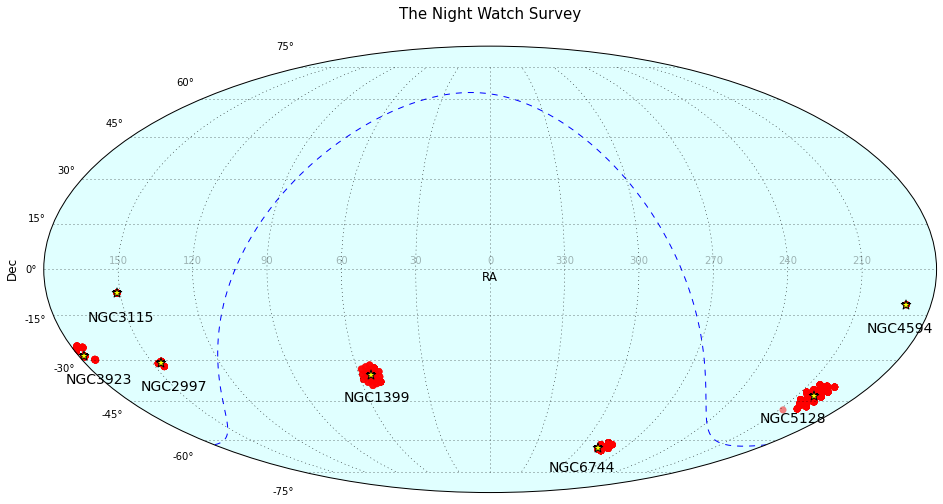

In [15]:
fig=plot_mwd(cat_data['ra'],cat_data['dec'], target=['NGC1399','NGC6744','NGC4594','NGC3115','NGC5128','NGC2997','NGC3923'], title='The Night Watch Survey')
fig.savefig('the_night_watch_survey.png', dpi=150, bbox_inches = 'tight')

## Now the DES Year1

In [20]:
cat_file='data/NOAO_DES_Y1.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

print 'Column names: ', str(cat_data.colnames)
print np.unique(cat_data['dtpi']+' '+cat_data['dtpropid'])
print np.unique(cat_data['filter'])
print 'Compressed: ', np.sum(cat_data['filesize']/1024.**3), ' GB'
print 'Uncompressed: ', np.sum(cat_data['filesize']/1024.**3)*6.5, ' GB'

Column names:  ['reference', 'dtpropid', 'surveyid', 'release_date', 'start_date', 'date_obs', 'dtpi', 'ra', 'dec', 'telescope', 'instrument', 'filter', 'exposure', 'obstype', 'obsmode', 'proctype', 'prodtype', 'seeing', 'depth', 'dtacqnam', 'archive_file', 'filesize', 'md5sum']
       dtpi       
------------------
Frieman 2012B-0001
 Walker 2013A-9999
filter
------
     Y
     g
     i
     r
     z
Compressed:  4045.20079583  GB
Uncompressed:  26293.8051729  GB


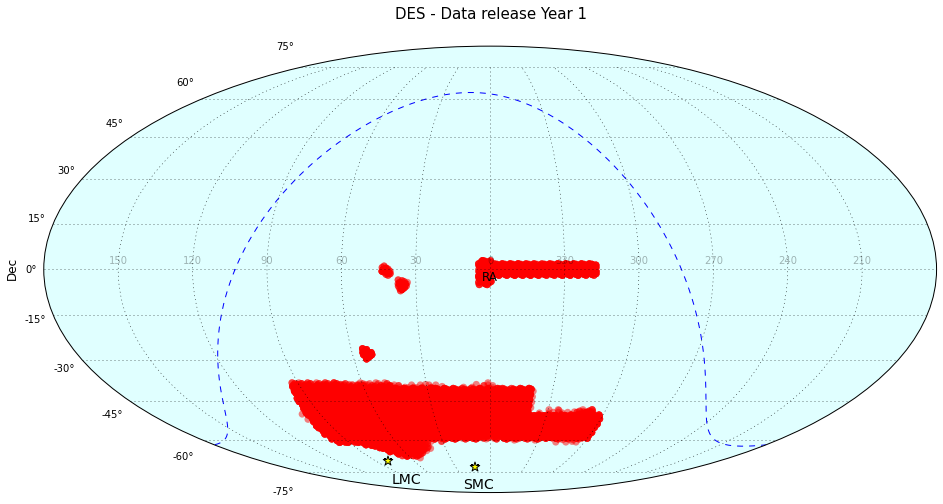

In [8]:
fig=plot_mwd(cat_data['ra'],cat_data['dec'], title='DES - Data release Year 1', target=['SMC','LMC'])
fig.savefig('DES_Y1.png', dpi=150, bbox_inches = 'tight')

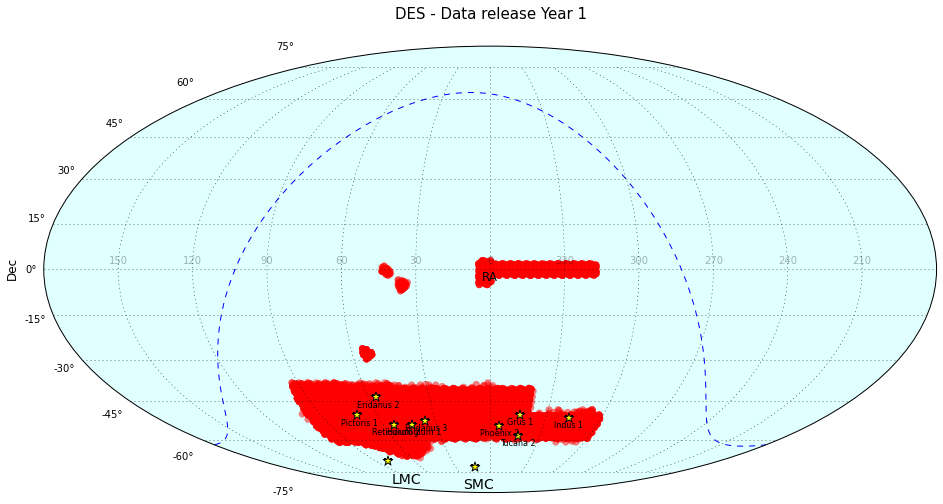

In [9]:
fig=plot_mwd(cat_data['ra'],cat_data['dec'], title='DES - Data release Year 1', target=['SMC','LMC'], dwarf_desy1=True)
fig.savefig('DES_Y1_dwarfs.png', dpi=150, bbox_inches = 'tight')

## Now the DES Year2

In [21]:
cat_file='data/NOAO_DES_Y2.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

print 'Column names: ', str(cat_data.colnames)
print np.unique(cat_data['dtpi']+' '+cat_data['dtpropid'])
print np.unique(cat_data['filter'])

print 'Compressed: ', np.sum(cat_data['filesize']/1024.**3), ' GB'
print 'Uncompressed: ', np.sum(cat_data['filesize']/1024.**3)*6.5, ' GB'

Column names:  ['reference', 'dtpropid', 'surveyid', 'release_date', 'start_date', 'date_obs', 'dtpi', 'ra', 'dec', 'telescope', 'instrument', 'filter', 'exposure', 'obstype', 'obsmode', 'proctype', 'prodtype', 'seeing', 'depth', 'dtacqnam', 'archive_file', 'filesize', 'md5sum']
       dtpi       
------------------
Frieman 2012B-0001
Frieman 2014B-0071
 Walker 2013A-9999
 Walker 2015A-0059
filter
------
     V
     Y
     g
     i
     r
     u
     z
Compressed:  1780.31516343  GB
Uncompressed:  11572.0485623  GB


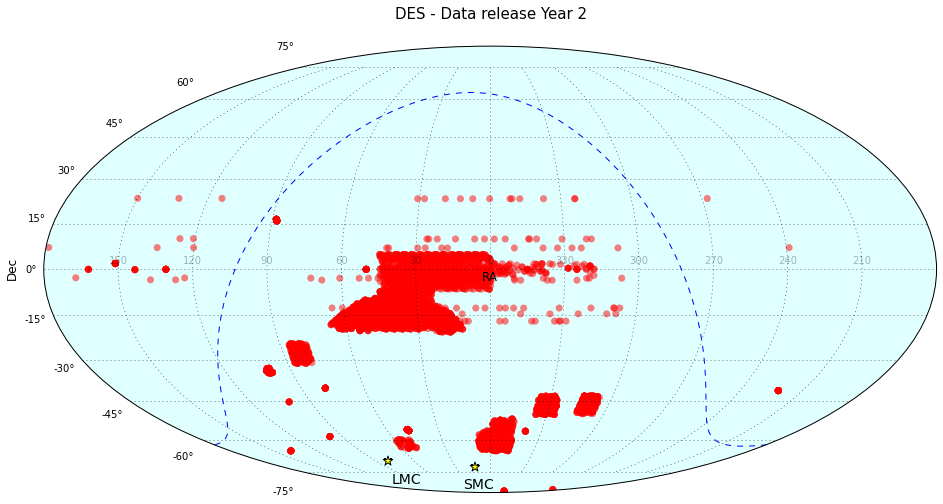

In [11]:
fig=plot_mwd(cat_data['ra'],cat_data['dec'], title='DES - Data release Year 2', target=['SMC','LMC'])
fig.savefig('DES_Y2.png', dpi=150, bbox_inches = 'tight')

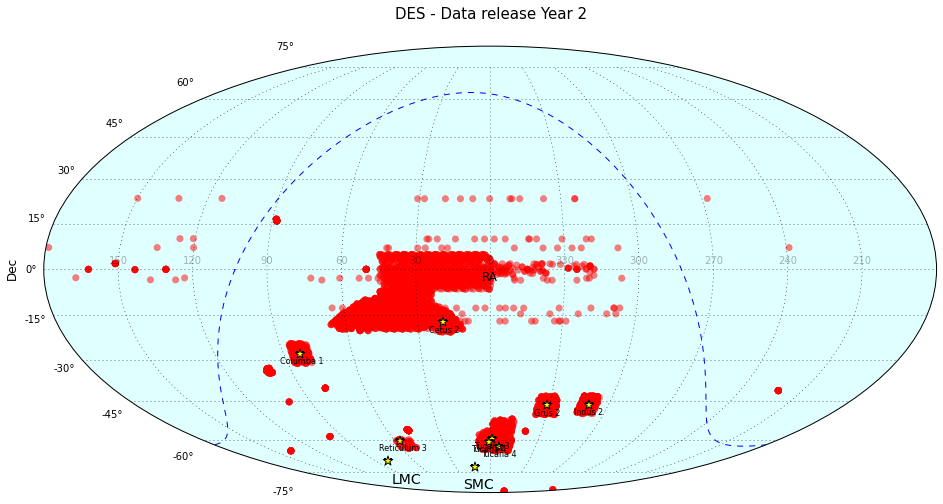

In [12]:
fig=plot_mwd(cat_data['ra'],cat_data['dec'], title='DES - Data release Year 2', target=['SMC','LMC'], dwarf_desy2=True)
fig.savefig('DES_Y2_dwarfs.png', dpi=150, bbox_inches = 'tight')

[1484 1483 1482 ..., 1487 1486 1485]


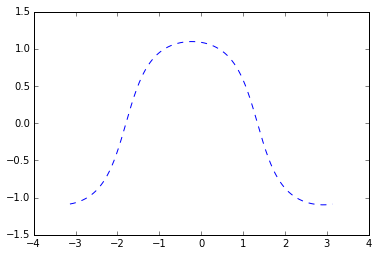

In [9]:
import astropy.units as u
from astropy.coordinates import SkyCoord

orig=0.
l=np.arange(0,360,0.2)
b=np.zeros(len(l))
coo=SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic').transform_to('fk5')
x=np.remainder(coo.ra.value+360-orig,360)
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
x=np.radians(-x)    # reverse the scale: East to the left
y=np.radians(coo.dec.value)
gv_sort=np.argsort(x)
print gv_sort
plt.plot(x[gv_sort],y[gv_sort],'--',color='blue')

Program:  Munoz 2014B-0609  - N of tiles:  4
Tile 1 - Coo: 287.7622  -62.2343 - N images: 5 - Total Exposure: 3000.0 s
Tile 2 - Coo: 283.3900  -64.8641 - N images: 5 - Total Exposure: 3000.0 s
Tile 3 - Coo: 287.0595  -64.0392 - N images: 5 - Total Exposure: 3000.0 s
Tile 4 - Coo: 284.1094  -63.0549 - N images: 5 - Total Exposure: 3000.0 s
---
Program:  Puzia 2015A-0630  - N of tiles:  4
Tile 1 - Coo: 287.0758  -64.0417 - N images: 4 - Total Exposure: 2400.0 s
Tile 2 - Coo: 283.4037  -64.8641 - N images: 4 - Total Exposure: 2400.0 s
Tile 3 - Coo: 284.1197  -63.0557 - N images: 4 - Total Exposure: 2400.0 s
Tile 4 - Coo: 287.7681  -62.2340 - N images: 4 - Total Exposure: 2400.0 s
---


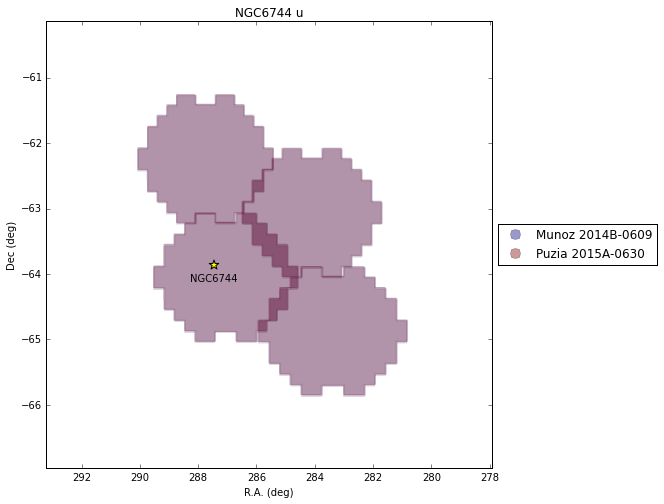

In [3]:
#gv=((cat_data['filter']=='u'))# & (cat_data['dtpropid']!='2014A-0611') & (cat_data['dtpropid']!='2014A-0321'))
#print 'Total exposure: ', np.sum(cat_data['exposure'][gv])/4
#plot_decam_footprint(cat_data['ra'][gv], cat_data['dec'][gv], title='NGC6744 DECam u-band')
plot_decam_footprint(cat_data[], target='NGC6744', filter='u')

Program:  Geha 2014A-0321  - N of tiles:  1
Tile 1 - Coo: 287.4854  -63.8254 - N images: 9 - Total Exposure: 1602.0 s
---
Program:  Geha 2015A-0234  - N of tiles:  4
Tile 1 - Coo: 283.3768  -64.8494 - N images: 2 - Total Exposure: 600.0 s
Tile 2 - Coo: 287.0500  -64.0262 - N images: 2 - Total Exposure: 600.0 s
Tile 3 - Coo: 284.1005  -63.0386 - N images: 1 - Total Exposure: 300.0 s
Tile 4 - Coo: 287.7537  -62.2175 - N images: 1 - Total Exposure: 300.0 s
---
Program:  Munoz 2014B-0609  - N of tiles:  4
Tile 1 - Coo: 284.1122  -63.0587 - N images: 12 - Total Exposure: 3600.0 s
Tile 2 - Coo: 283.3937  -64.8672 - N images: 12 - Total Exposure: 3600.0 s
Tile 3 - Coo: 287.0628  -64.0444 - N images: 12 - Total Exposure: 3600.0 s
Tile 4 - Coo: 287.7614  -62.2378 - N images: 12 - Total Exposure: 3600.0 s
---
Program:  Puzia 2015A-0630  - N of tiles:  4
Tile 1 - Coo: 284.1230  -63.0571 - N images: 4 - Total Exposure: 1200.0 s
Tile 2 - Coo: 283.4064  -64.8658 - N images: 4 - Total Exposure: 1200.

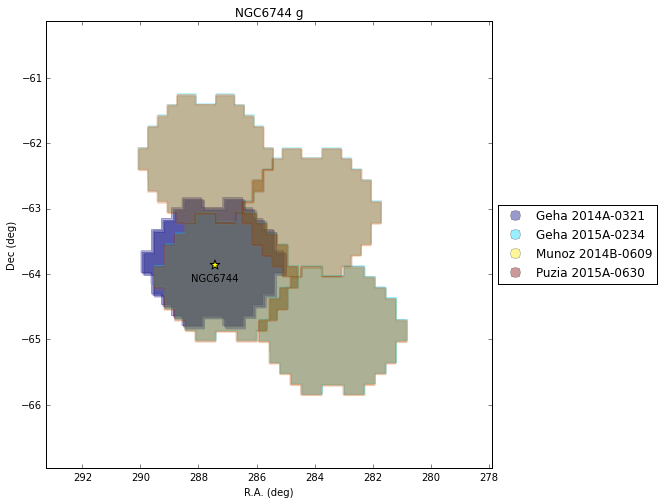

In [4]:
plot_decam_footprint(cat_data, target='NGC6744', filter='g')

Program:  Chaname 2014B-0610  - N of tiles:  4
Tile 1 - Coo: 287.7546  -62.2264 - N images: 7 - Total Exposure: 2100.0 s
Tile 2 - Coo: 283.3871  -64.8560 - N images: 7 - Total Exposure: 2100.0 s
Tile 3 - Coo: 287.0579  -64.0332 - N images: 7 - Total Exposure: 2100.0 s
Tile 4 - Coo: 284.1050  -63.0478 - N images: 7 - Total Exposure: 2100.0 s
---
Program:  Munoz 2014B-0609  - N of tiles:  4
Tile 1 - Coo: 287.0685  -64.0460 - N images: 5 - Total Exposure: 1500.0 s
Tile 2 - Coo: 283.3959  -64.8718 - N images: 5 - Total Exposure: 1500.0 s
Tile 3 - Coo: 284.1163  -63.0615 - N images: 5 - Total Exposure: 1500.0 s
Tile 4 - Coo: 287.7729  -62.2410 - N images: 4 - Total Exposure: 1200.0 s
---
Program:  Puzia 2015A-0630  - N of tiles:  4
Tile 1 - Coo: 283.4055  -64.8662 - N images: 4 - Total Exposure: 1200.0 s
Tile 2 - Coo: 284.1219  -63.0572 - N images: 4 - Total Exposure: 1200.0 s
Tile 3 - Coo: 287.7708  -62.2366 - N images: 4 - Total Exposure: 1200.0 s
Tile 4 - Coo: 287.0761  -64.0436 - N imag

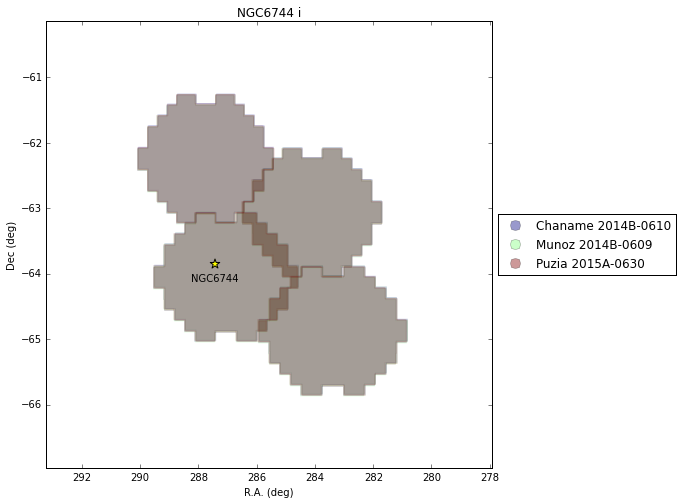

In [5]:
plot_decam_footprint(cat_data, target='NGC6744', filter='i')

Program:  Geha 2014A-0321  - N of tiles:  1
Tile 1 - Coo: 287.4857  -63.8283 - N images: 9 - Total Exposure: 1701.0 s
---


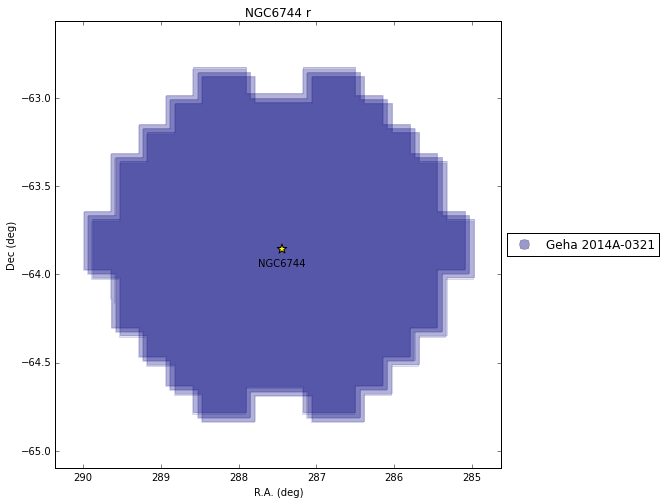

In [6]:
plot_decam_footprint(cat_data, target='NGC6744', filter='r')

Program:  Geha 2014A-0321  - N of tiles:  1
Tile 1 - Coo: 287.4870  -63.8296 - N images: 9 - Total Exposure: 1800.0 s
---
Program:  Geha 2015A-0234  - N of tiles:  4
Tile 1 - Coo: 283.3925  -64.8646 - N images: 9 - Total Exposure: 2700.0 s
Tile 2 - Coo: 287.0642  -64.0415 - N images: 9 - Total Exposure: 2700.0 s
Tile 3 - Coo: 284.1032  -63.0550 - N images: 8 - Total Exposure: 2400.0 s
Tile 4 - Coo: 287.7584  -62.2327 - N images: 7 - Total Exposure: 2100.0 s
---
Program:  Munoz 2014A-0611  - N of tiles:  1
Tile 1 - Coo: 287.4894  -63.8321 - N images: 9 - Total Exposure: 1800.0 s
---


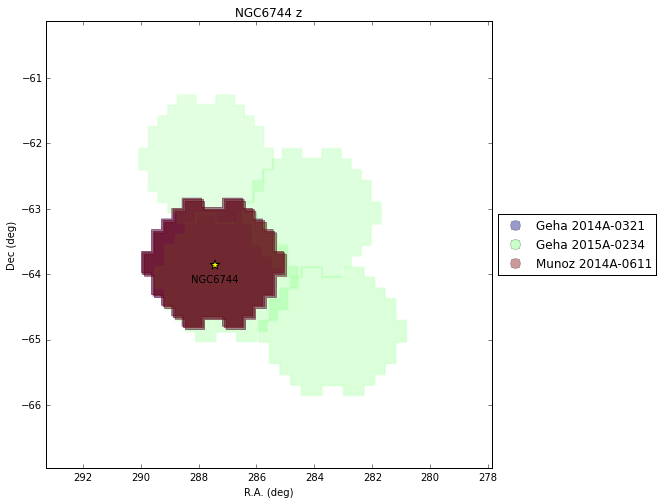

In [7]:
plot_decam_footprint(cat_data, target='NGC6744', filter='z')

Program:  Munoz 2014A-0611  - N of tiles:  1
Tile 1 - Coo: 287.4870  -63.8318 - N images: 27 - Total Exposure: 5400.0 s
---


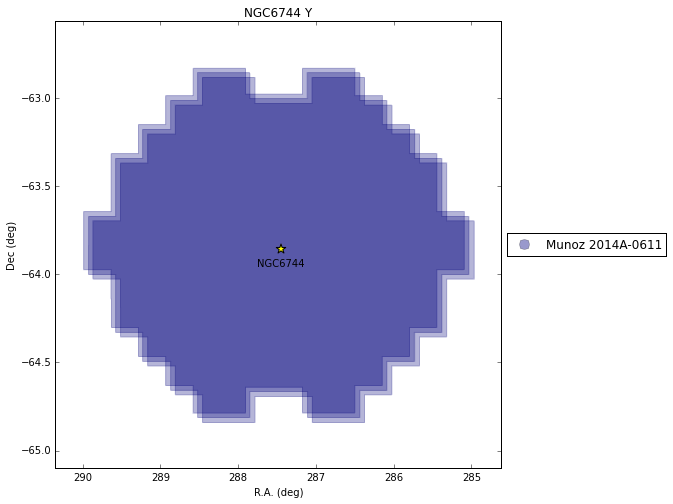

In [8]:
plot_decam_footprint(cat_data, target='NGC6744', filter='Y')

## We display all the DECam observations of NGC4594 (Sombrero galaxy)

In [9]:
cat_file='data/NOAO_NGC4594_april_2016.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

Program:  Taylor 2014A-0610  - N of tiles:  1
Tile 1 - Coo: 189.9973  -11.6209 - N images: 3 - Total Exposure: 2700.0 s
---
Program:  von der Linden 2013A-0360  - N of tiles:  1
Tile 1 - Coo: 191.1640  -12.0488 - N images: 52 - Total Exposure: 11750.0 s
---


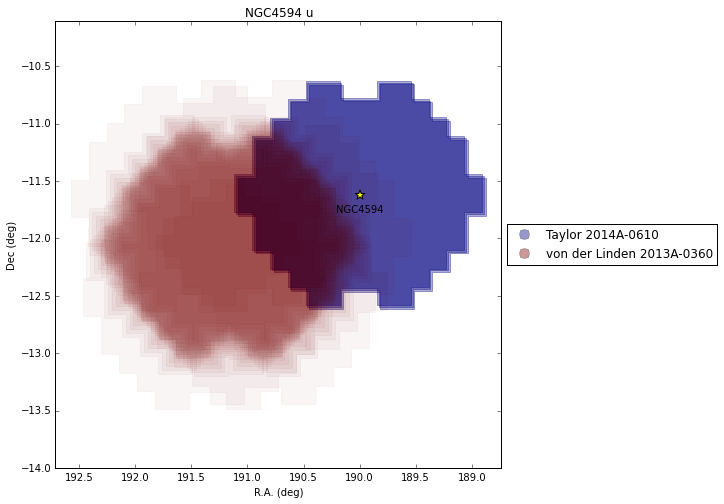

In [10]:
plot_decam_footprint(cat_data, target='NGC4594', filter='u')

Program:  Munoz 2013A-0613  - N of tiles:  1
Tile 1 - Coo: 189.2391  -11.5283 - N images: 6 - Total Exposure: 1800.0 s
---
Program:  Rich 2013A-0529  - N of tiles:  1
Tile 1 - Coo: 190.0029  -11.6594 - N images: 24 - Total Exposure: 6000.0 s
---
Program:  von der Linden 2013A-0360  - N of tiles:  1
Tile 1 - Coo: 191.1916  -12.0924 - N images: 22 - Total Exposure: 3800.0 s
---


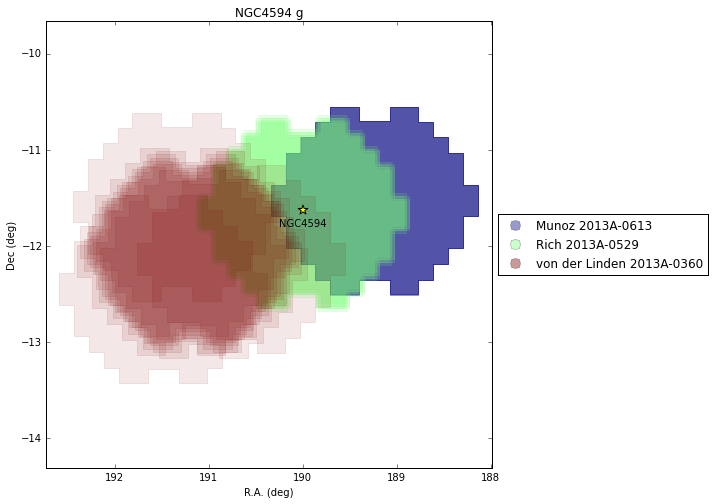

In [11]:
plot_decam_footprint(cat_data, target='NGC4594', filter='g')

Program:  Rich 2013A-0529  - N of tiles:  1
Tile 1 - Coo: 190.0033  -11.6599 - N images: 18 - Total Exposure: 4500.0 s
---
Program:  Taylor 2014A-0610  - N of tiles:  1
Tile 1 - Coo: 189.9942  -11.6216 - N images: 3 - Total Exposure: 900.0 s
---
Program:  von der Linden 2013A-0360  - N of tiles:  1
Tile 1 - Coo: 191.1470  -12.0646 - N images: 52 - Total Exposure: 12500.0 s
---


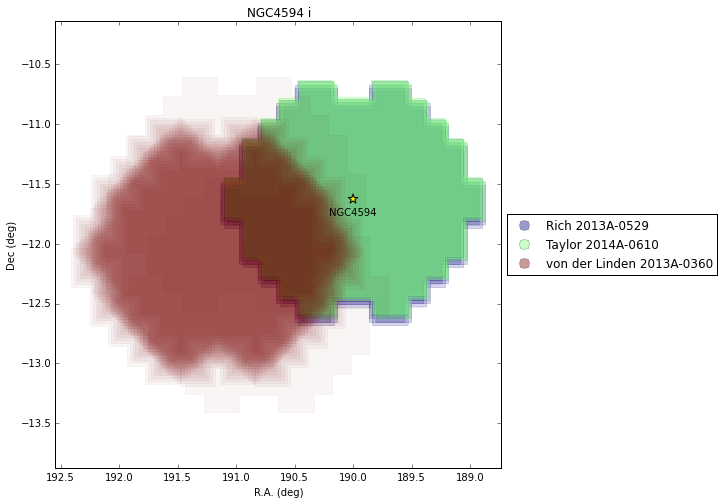

In [12]:
plot_decam_footprint(cat_data, target='NGC4594', filter='i')

## We display all the DECam observations of NGC3115

In [13]:
cat_file='data/NOAO_NGC3115_april_2016.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

In [14]:
plot_decam_footprint(cat_data, target='NGC3115', filter='u')

There are no observations in the filter  u


Program:  Forster 2015A-0608  - N of tiles:  2
Tile 1 - Coo: 150.0865  -6.0934 - N images: 28 - Total Exposure: 2424.0 s
Tile 2 - Coo: 152.3964  -6.0935 - N images: 28 - Total Exposure: 2424.0 s
---
Program:  Silva 2012B-9999  - N of tiles:  1
Tile 1 - Coo: 150.0050  -10.0793 - Exposure: 200.0 s
---
Program:  Sullivan 2014B-0146  - N of tiles:  2
Tile 1 - Coo: 152.3983  -6.0992 - N images: 1 - Total Exposure: 86.0 s
Tile 2 - Coo: 150.0882  -6.0995 - N images: 1 - Total Exposure: 86.0 s
---
Program:  Taylor 2014A-0610  - N of tiles:  1
Tile 1 - Coo: 151.3092  -7.7148 - N images: 6 - Total Exposure: 1800.0 s
---
Program:  von der Linden 2013A-0360  - N of tiles:  1
Tile 1 - Coo: 149.1372  -10.1373 - N images: 16 - Total Exposure: 3200.0 s
---


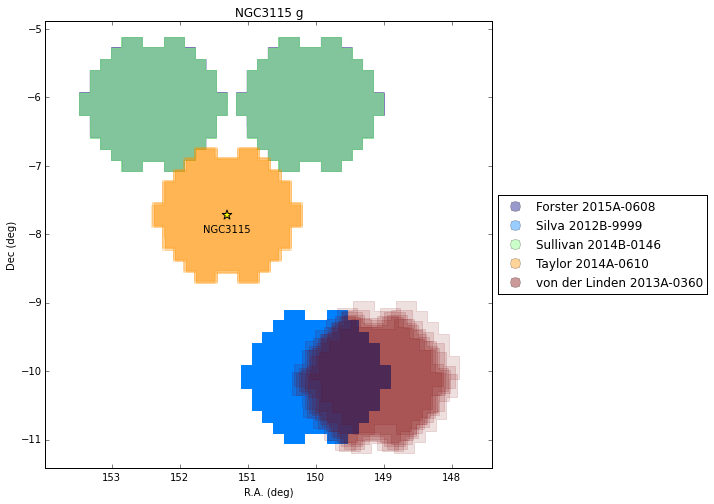

In [15]:
plot_decam_footprint(cat_data, target='NGC3115', filter='g')

Program:  Forster 2015A-0608  - N of tiles:  2
Tile 1 - Coo: 150.0859  -6.0923 - N images: 5 - Total Exposure: 446.0 s
Tile 2 - Coo: 152.3960  -6.0923 - N images: 5 - Total Exposure: 446.0 s
---


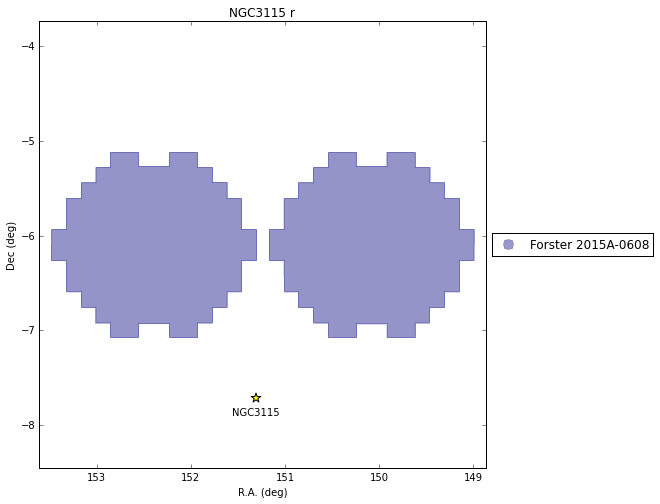

In [16]:
plot_decam_footprint(cat_data, target='NGC3115', filter='r')

Program:  Forster 2015A-0608  - N of tiles:  2
Tile 1 - Coo: 150.0877  -6.0941 - N images: 2 - Total Exposure: 188.0 s
Tile 2 - Coo: 152.3981  -6.0938 - N images: 2 - Total Exposure: 188.0 s
---
Program:  Taylor 2014A-0610  - N of tiles:  1
Tile 1 - Coo: 151.3091  -7.7152 - N images: 6 - Total Exposure: 1800.0 s
---


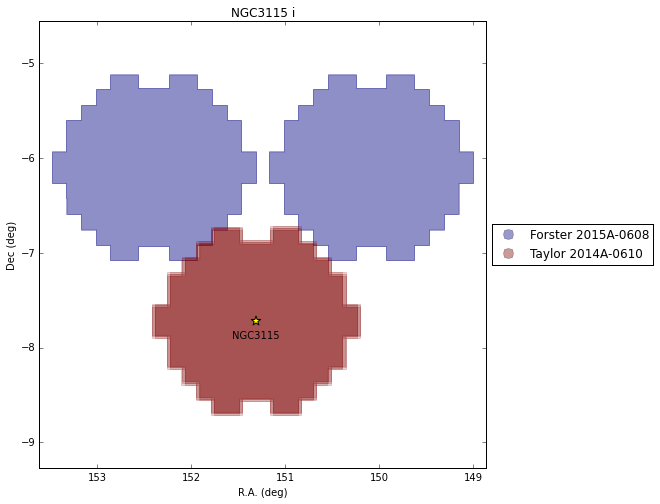

In [17]:
plot_decam_footprint(cat_data, target='NGC3115', filter='i')

Program:  von der Linden 2013A-0360  - N of tiles:  1
Tile 1 - Coo: 149.2601  -9.9628 - N images: 36 - Total Exposure: 8160.0 s
---


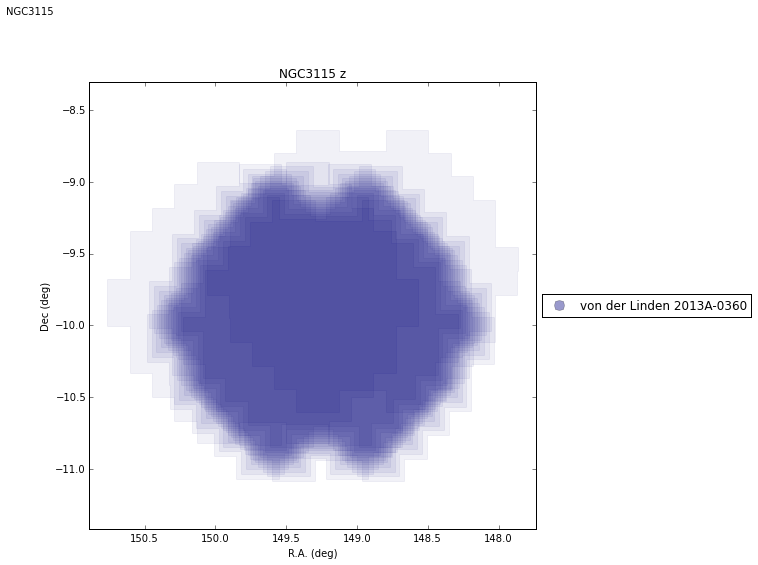

In [19]:
plot_decam_footprint(cat_data, target='NGC3115', filter='z')

## We display all the DECam observations of M87

In [21]:
cat_file='data/NOAO_M87_april_2016.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

In [22]:
plot_decam_footprint(cat_data, target='M87', filter='u')

There are no observations in the filter  u


In [23]:
plot_decam_footprint(cat_data, target='M87', filter='g')

There are no observations in the filter  g


In [24]:
plot_decam_footprint(cat_data, target='M87', filter='r')

There are no observations in the filter  r


In [25]:
plot_decam_footprint(cat_data, target='M87', filter='i')

There are no observations in the filter  i


Program:  Schlegel 2014B-0404  - N of tiles:  4
Tile 1 - Coo: 188.6426  11.3390 - N images: 2 - Total Exposure: 170.0 s
Tile 2 - Coo: 187.7436  12.7082 - N images: 2 - Total Exposure: 167.0 s
Tile 3 - Coo: 186.6257  11.2842 - N images: 1 - Total Exposure: 88.0 s
Tile 4 - Coo: 186.2913  12.5136 - N images: 1 - Total Exposure: 91.0 s
---


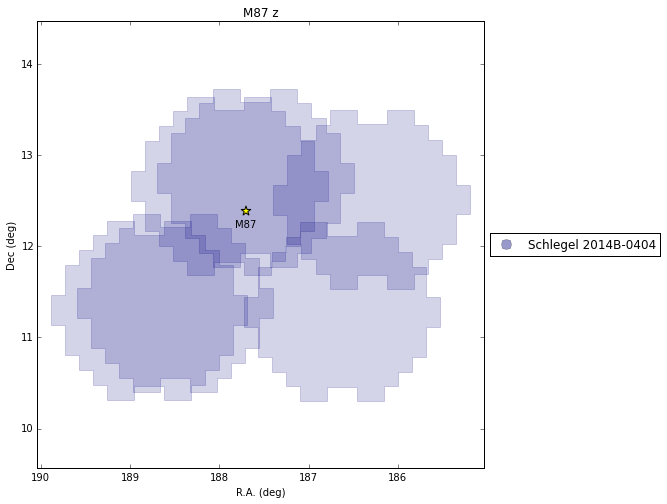

In [26]:
plot_decam_footprint(cat_data, target='M87', filter='z')

## We display all the DECam observations of M49

In [27]:
cat_file='data/NOAO_M49_april_2016.xml'
cat_data = parse_single_table(cat_file).to_table(use_names_over_ids=True)
for i in range(len(cat_data)):
    cat_data['filter'][i]=str(cat_data['filter'][i][0])

In [28]:
plot_decam_footprint(cat_data, target='M49', filter='u')

There are no observations in the filter  u


In [29]:
plot_decam_footprint(cat_data, target='M49', filter='g')

There are no observations in the filter  g


In [30]:
plot_decam_footprint(cat_data, target='M49', filter='r')

There are no observations in the filter  r


In [31]:
plot_decam_footprint(cat_data, target='M49', filter='i')

There are no observations in the filter  i


Program:  Schlegel 2013A-0741  - N of tiles:  4
Tile 1 - Coo: 188.9298  6.9810 - N images: 2 - Total Exposure: 200.0 s
Tile 2 - Coo: 188.8575  7.5331 - N images: 2 - Total Exposure: 200.0 s
Tile 3 - Coo: 186.2572  8.7684 - N images: 2 - Total Exposure: 200.0 s
Tile 4 - Coo: 188.0409  8.2325 - N images: 2 - Total Exposure: 200.0 s
---
Program:  Schlegel 2014B-0404  - N of tiles:  3
Tile 1 - Coo: 188.5754  8.4875 - N images: 2 - Total Exposure: 160.0 s
Tile 2 - Coo: 187.6245  7.0356 - N images: 2 - Total Exposure: 146.0 s
Tile 3 - Coo: 186.5687  8.4631 - N images: 1 - Total Exposure: 66.0 s
---


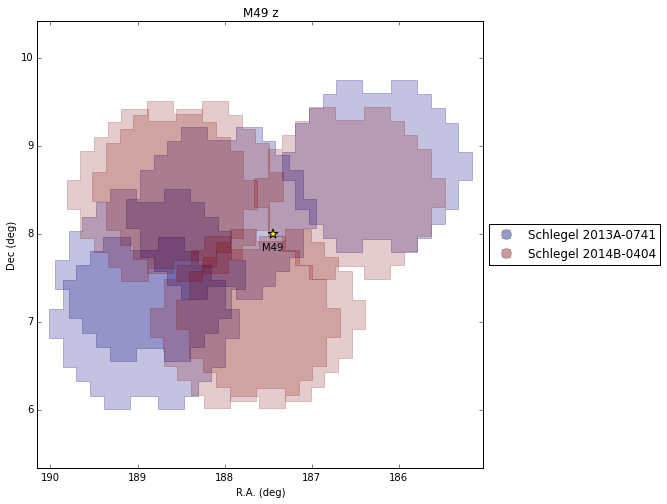

In [32]:
plot_decam_footprint(cat_data, target='M49', filter='z')